In [3]:
import matplotlib.pyplot as plt
import pandas as pd
def convert_quarter_to_date(year_quarter_str):
    year, quarter = year_quarter_str.split(' ')
    year = int(year)
    # Convert quarter to month
    if quarter == 'Q1':
        return pd.to_datetime(f'{year}-01-01')
    elif quarter == 'Q2':
        return pd.to_datetime(f'{year}-04-01')
    elif quarter == 'Q3':
        return pd.to_datetime(f'{year}-07-01')
    elif quarter == 'Q4':
        return pd.to_datetime(f'{year}-10-01')

    





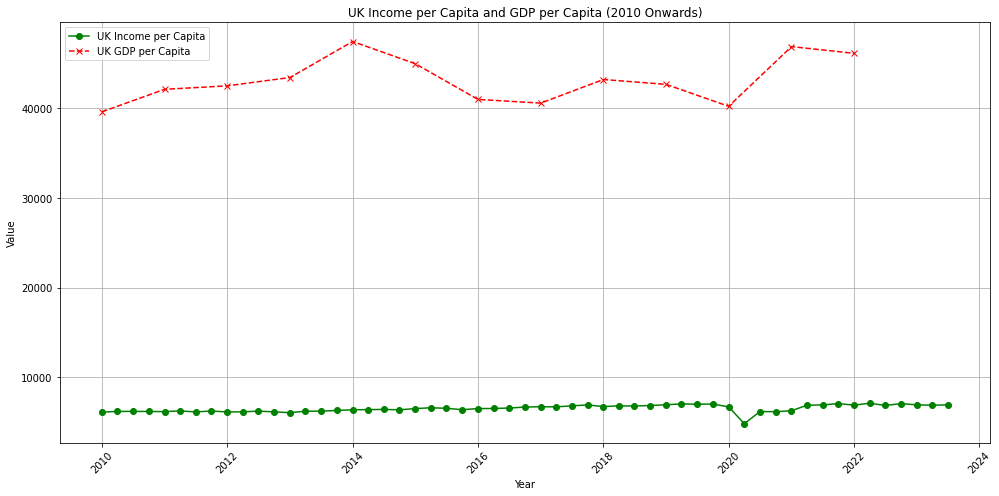

In [4]:
uk_income_updated_path = 'data/UK Real net national disposable income per capita CVM SA.csv'
uk_gdp_updated_path = 'data/UK Real gross domestic.csv'

# Attempting to read the updated files
uk_income_updated_df = pd.read_csv(uk_income_updated_path)
uk_gdp_updated_df = pd.read_csv(uk_gdp_updated_path)


# Processing the UK income dataset for quarterly data
uk_income_updated_df['Year'] = uk_income_updated_df['Year'].apply(convert_quarter_to_date)

# Filter both datasets from 2010 onwards
uk_income_filtered = uk_income_updated_df[uk_income_updated_df['Year'].dt.year >= 2010]
uk_gdp_updated_df['DATE'] = pd.to_datetime(uk_gdp_updated_df['DATE'])
uk_gdp_filtered = uk_gdp_updated_df[uk_gdp_updated_df['DATE'].dt.year >= 2010]

# Preparing for visualization
plt.figure(figsize=(14, 7))

# Plot UK Real Net National Disposable Income per Capita
plt.plot(uk_income_filtered['Year'], uk_income_filtered['income'], label='UK Income per Capita', marker='o', linestyle='-', color='green')

# Plot UK Real GDP per Capita
plt.plot(uk_gdp_filtered['DATE'], uk_gdp_filtered['PCAGDPGBA646NWDB'], label='UK GDP per Capita', marker='x', linestyle='--', color='red')

# Formatting the plot
plt.title('UK Income per Capita and GDP per Capita (2010 Onwards)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
